In [26]:
# import dependencies
import tensorflow as tf
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [9]:
# Avoiding OOM errors by setting GPU memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
# confirming that out workload is GPU accelerated
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
# Import the data
# Base path t food dataset
food_base_path = "./data/Food"

In [12]:
# printing the list of subdirectories excluding the txt files
subfolders = [dir for dir in os.listdir("./data/Food") if os.path.isdir(os.path.join("./data/Food", dir))]
subfolders

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [13]:
# Lets count the number of images in each subfolder:

count_images_subfolders = {category: len(os.listdir(f'./data/Food/{category}')) for category in subfolders}
count_images_subfolders


{'apple_pie': 1000,
 'baby_back_ribs': 1000,
 'baklava': 1000,
 'beef_carpaccio': 1000,
 'beef_tartare': 1000,
 'beet_salad': 1000,
 'beignets': 1000,
 'bibimbap': 1000,
 'bread_pudding': 1000,
 'breakfast_burrito': 1000,
 'bruschetta': 1000,
 'caesar_salad': 1000,
 'cannoli': 1000,
 'caprese_salad': 1000,
 'carrot_cake': 1000,
 'ceviche': 1000,
 'cheesecake': 1000,
 'cheese_plate': 1000,
 'chicken_curry': 1000,
 'chicken_quesadilla': 1000,
 'chicken_wings': 1000,
 'chocolate_cake': 1000,
 'chocolate_mousse': 1000,
 'churros': 1000,
 'clam_chowder': 1000,
 'club_sandwich': 1000,
 'crab_cakes': 1000,
 'creme_brulee': 1000,
 'croque_madame': 1000,
 'cup_cakes': 1000,
 'deviled_eggs': 1000,
 'donuts': 1000,
 'dumplings': 1000,
 'edamame': 1000,
 'eggs_benedict': 1000,
 'escargots': 1000,
 'falafel': 1000,
 'filet_mignon': 1000,
 'fish_and_chips': 1000,
 'foie_gras': 1000,
 'french_fries': 1000,
 'french_onion_soup': 1000,
 'french_toast': 1000,
 'fried_calamari': 1000,
 'fried_rice': 1000

In [14]:
print(f"The total number of categories in the food dataset are {len(count_images_subfolders.keys())}")
print(f"The total number of images in the dataset are {sum(count_images_subfolders.values())}")

The total number of categories in the food dataset are 101
The total number of images in the dataset are 101000


It looks like we have a total of 101 classes and the dataset is balanced with 1000 images belonging to each class. This means that we do not have to worry about an imbalanced dataset which will rule out the bias which comes from the dataset being unbalanced

In [15]:
def analyze_random_images(image_folder):
    random_image_stats = []

    for subfolder in os.listdir(image_folder):
        subfolder_path = os.path.join(image_folder, subfolder)
        
        if os.path.isdir(subfolder_path):
            images = os.listdir(subfolder_path)
            if images:
                random_image = random.choice(images)
                image_path = os.path.join(subfolder_path, random_image)

                # Open and analyze the image
                with Image.open(image_path) as img:
                    width, height = img.size
                    image_array = np.array(img)
                    avg_pixel_intensity = image_array.mean()

                    random_image_stats.append((subfolder, random_image, (width, height), avg_pixel_intensity))

    return random_image_stats


In [16]:
image_folder = "./data/Food"
random_image_stats = analyze_random_images(image_folder)

for stat in random_image_stats:
    print(f"Subfolder: {stat[0]}, Image: {stat[1]}, Dimensions: {stat[2]}, Avg Pixel Intensity: {stat[3]:.2f}")

Subfolder: apple_pie, Image: 395303.jpg, Dimensions: (512, 512), Avg Pixel Intensity: 65.53
Subfolder: baby_back_ribs, Image: 2559404.jpg, Dimensions: (512, 384), Avg Pixel Intensity: 113.52
Subfolder: baklava, Image: 2198175.jpg, Dimensions: (512, 512), Avg Pixel Intensity: 112.12
Subfolder: beef_carpaccio, Image: 153517.jpg, Dimensions: (382, 512), Avg Pixel Intensity: 51.95
Subfolder: beef_tartare, Image: 298033.jpg, Dimensions: (512, 384), Avg Pixel Intensity: 145.11
Subfolder: beet_salad, Image: 2012446.jpg, Dimensions: (512, 512), Avg Pixel Intensity: 111.73
Subfolder: beignets, Image: 1098287.jpg, Dimensions: (512, 512), Avg Pixel Intensity: 155.48
Subfolder: bibimbap, Image: 2295545.jpg, Dimensions: (512, 512), Avg Pixel Intensity: 133.46
Subfolder: bread_pudding, Image: 2674350.jpg, Dimensions: (512, 384), Avg Pixel Intensity: 112.26
Subfolder: breakfast_burrito, Image: 3376705.jpg, Dimensions: (512, 430), Avg Pixel Intensity: 139.03
Subfolder: bruschetta, Image: 995392.jpg, D

In [17]:
# using data from random_image_stats to plot the pixel intensities and dimentions (average)

widths = []
heights = []
avg_pixel_intensities = []

for _, _, (width, height), avg_intensity in random_image_stats:
    widths.append(width)
    heights.append(height)
    avg_pixel_intensities.append(avg_intensity)

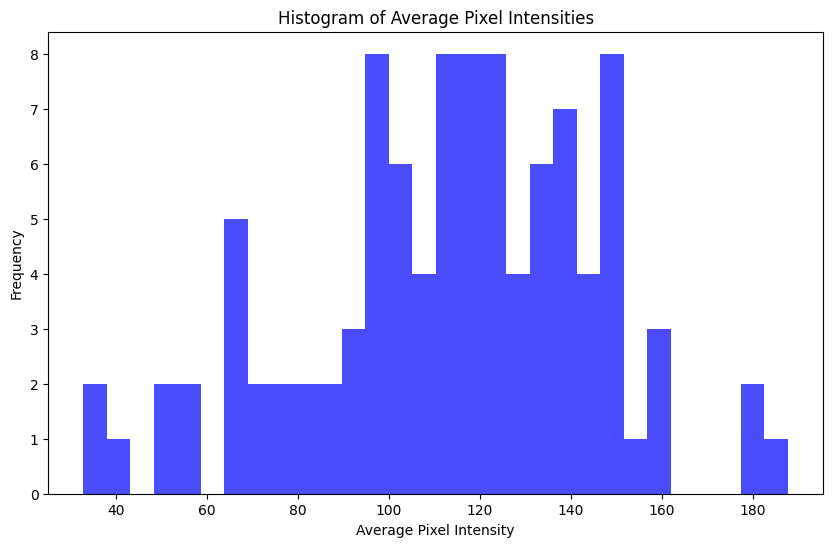

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(avg_pixel_intensities, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Average Pixel Intensities')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

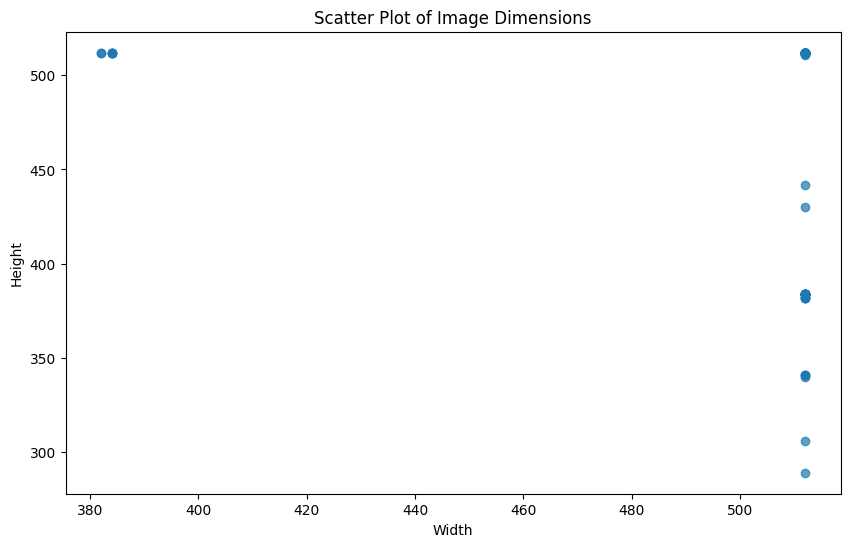

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.7)
plt.title('Scatter Plot of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

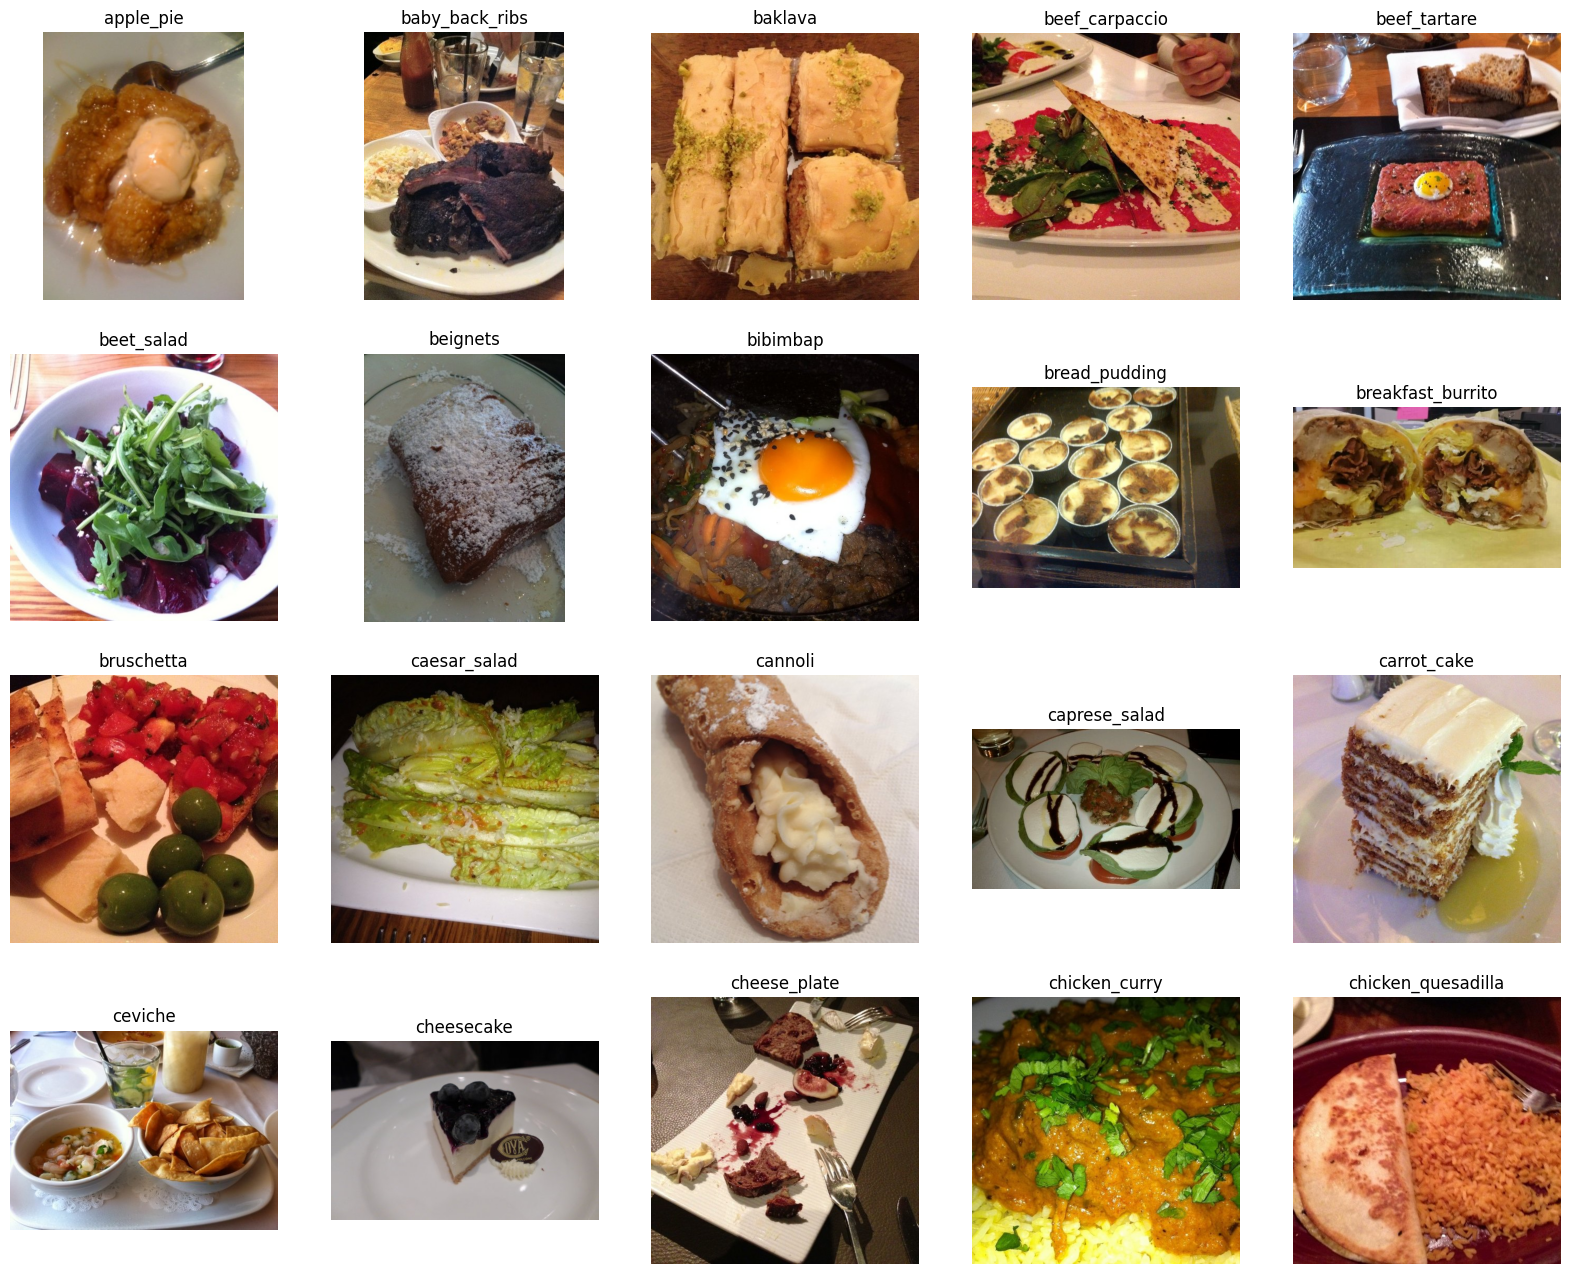

In [42]:
# lets print one image randomly selected from the first 20 folders
selected_images = []
classes = []

# Lets define the subfolders again but this time we preserve the directory structure:
subdirs = [os.path.join(food_base_path, f) for f in os.listdir(food_base_path) if os.path.isdir(os.path.join(food_base_path, f))]

first_twenty_subfolders = subdirs[:20]

first_twenty_subfolders


# Randomly select one image from each subfolder
for folder in first_twenty_subfolders:
    images = [os.path.join(folder, img) for img in os.listdir(folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(selected_image)
        classes.append(os.path.basename(folder))  # Folder name as class


plt.figure(figsize=(20, 16))
for i, img_path in enumerate(selected_images):
    plt.subplot(4, 5, i + 1) # 4 rows and 5 columns
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes[i])
plt.show()


Since our dataset comes with a train and test .txt files, we will go ahead and create these folders to split our data set 

In [44]:
# Function that creates subfolders in the base pth if they dont already exist:

def create_subdirectories(base_path, subdirs):
    for dir in subdirs:
        path = os.path.join(base_path, dir)
        if not os.path.exists(path):
            os.makedirs(path)




In [66]:
# function to process the .txt files which reads each line from the file and splits it into subfolder and file name, then copies the file from the source to the destination folder.

def process_file_list(file_path, source_base_folder, destination_base_folder, file_extension='.jpg'):
    with open(file_path, 'r') as file:
        for line in file:
            subfolder, file_name = line.strip().split('/')
            file_name_with_extension = file_name + file_extension  # Append the file extension
            source_path = os.path.join(source_base_folder, subfolder, file_name_with_extension)
            destination_path = os.path.join(destination_base_folder, subfolder)

            if not os.path.exists(destination_path):
                os.makedirs(destination_path)

            shutil.copy(source_path, os.path.join(destination_path, file_name_with_extension))



In [20]:
# data base path
data_base_path = "./data"


In [21]:
# food_base_path = os.path.join(data_base_path, 'Food')
train_path = os.path.join(data_base_path, 'train')
test_path = os.path.join(data_base_path, 'test')

In [54]:
# Create subdirectories in train and test folders
create_subdirectories(train_path, subfolders)
create_subdirectories(test_path, subfolders)

In [22]:
# Lets, make sure that our "train.txt" and "test.txt" are in the same working directory. We can find our current working directoey by doing the following and move the these files here
print("Current Working Directory:", os.getcwd())

Current Working Directory: /mnt/c/Users/Mohsi/school/fall2023/Intro to Neural Networks/Final Project/FoodClassifierAI-Food-Identifier


In [67]:
#Process the train.txt and test.txt files to copy the train and test images in to the respective folders. Copying them is better than moving as it wont corrupt the files
process_file_list('train.txt', food_base_path, train_path)
process_file_list('test.txt', food_base_path, test_path)


Lets compare the number of images in the train vs test to analyze the split % since we arent aware of this

In [23]:
# Counting the training images

train_count_images_subfolders = {category: len(os.listdir(f'./data/train/{category}')) for category in subfolders}
train_count_images_subfolders

{'apple_pie': 750,
 'baby_back_ribs': 750,
 'baklava': 750,
 'beef_carpaccio': 750,
 'beef_tartare': 750,
 'beet_salad': 750,
 'beignets': 750,
 'bibimbap': 750,
 'bread_pudding': 750,
 'breakfast_burrito': 750,
 'bruschetta': 750,
 'caesar_salad': 750,
 'cannoli': 750,
 'caprese_salad': 750,
 'carrot_cake': 750,
 'ceviche': 750,
 'cheesecake': 750,
 'cheese_plate': 750,
 'chicken_curry': 750,
 'chicken_quesadilla': 750,
 'chicken_wings': 750,
 'chocolate_cake': 750,
 'chocolate_mousse': 750,
 'churros': 750,
 'clam_chowder': 750,
 'club_sandwich': 750,
 'crab_cakes': 750,
 'creme_brulee': 750,
 'croque_madame': 750,
 'cup_cakes': 750,
 'deviled_eggs': 750,
 'donuts': 750,
 'dumplings': 750,
 'edamame': 750,
 'eggs_benedict': 750,
 'escargots': 750,
 'falafel': 750,
 'filet_mignon': 750,
 'fish_and_chips': 750,
 'foie_gras': 750,
 'french_fries': 750,
 'french_onion_soup': 750,
 'french_toast': 750,
 'fried_calamari': 750,
 'fried_rice': 750,
 'frozen_yogurt': 750,
 'garlic_bread': 750

In [24]:
test_count_images_subfolders = {category: len(os.listdir(f'./data/test/{category}')) for category in subfolders}
test_count_images_subfolders

{'apple_pie': 250,
 'baby_back_ribs': 250,
 'baklava': 250,
 'beef_carpaccio': 250,
 'beef_tartare': 250,
 'beet_salad': 250,
 'beignets': 250,
 'bibimbap': 250,
 'bread_pudding': 250,
 'breakfast_burrito': 250,
 'bruschetta': 250,
 'caesar_salad': 250,
 'cannoli': 250,
 'caprese_salad': 250,
 'carrot_cake': 250,
 'ceviche': 250,
 'cheesecake': 250,
 'cheese_plate': 250,
 'chicken_curry': 250,
 'chicken_quesadilla': 250,
 'chicken_wings': 250,
 'chocolate_cake': 250,
 'chocolate_mousse': 250,
 'churros': 250,
 'clam_chowder': 250,
 'club_sandwich': 250,
 'crab_cakes': 250,
 'creme_brulee': 250,
 'croque_madame': 250,
 'cup_cakes': 250,
 'deviled_eggs': 250,
 'donuts': 250,
 'dumplings': 250,
 'edamame': 250,
 'eggs_benedict': 250,
 'escargots': 250,
 'falafel': 250,
 'filet_mignon': 250,
 'fish_and_chips': 250,
 'foie_gras': 250,
 'french_fries': 250,
 'french_onion_soup': 250,
 'french_toast': 250,
 'fried_calamari': 250,
 'fried_rice': 250,
 'frozen_yogurt': 250,
 'garlic_bread': 250

In [25]:
train_count = sum(train_count_images_subfolders.values())
test_count = sum(test_count_images_subfolders.values())
total_images = train_count + test_count

print(f"Train: {train_count/total_images * 100 : .2f}%")
print(f"Test: {test_count/total_images * 100 : .2f}%")

Train:  75.00%
Test:  25.00%
